## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

## Load dataset

In [5]:
dataset=pd.read_csv(r"C:\Users\sanal\Desktop\idatalytics\projects\unsupervised learning\clustering\Mall_Customers.csv")

In [8]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
dataset.drop(['CustomerID'], inplace = True, axis = 1)

In [10]:
dataset.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [13]:
dataset.isna().sum()


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:

dataset.rename(columns={'Annual Income (k$)':'Income'},inplace=True)
dataset.rename(columns={'Spending Score (1-100)':'spending'},inplace=True)

In [15]:
gender = {"Male":0,"Female":1}
dataset['Genre']=dataset['Genre'].map(gender)

In [16]:
dataset.head()


,Genre,Age,Income,spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


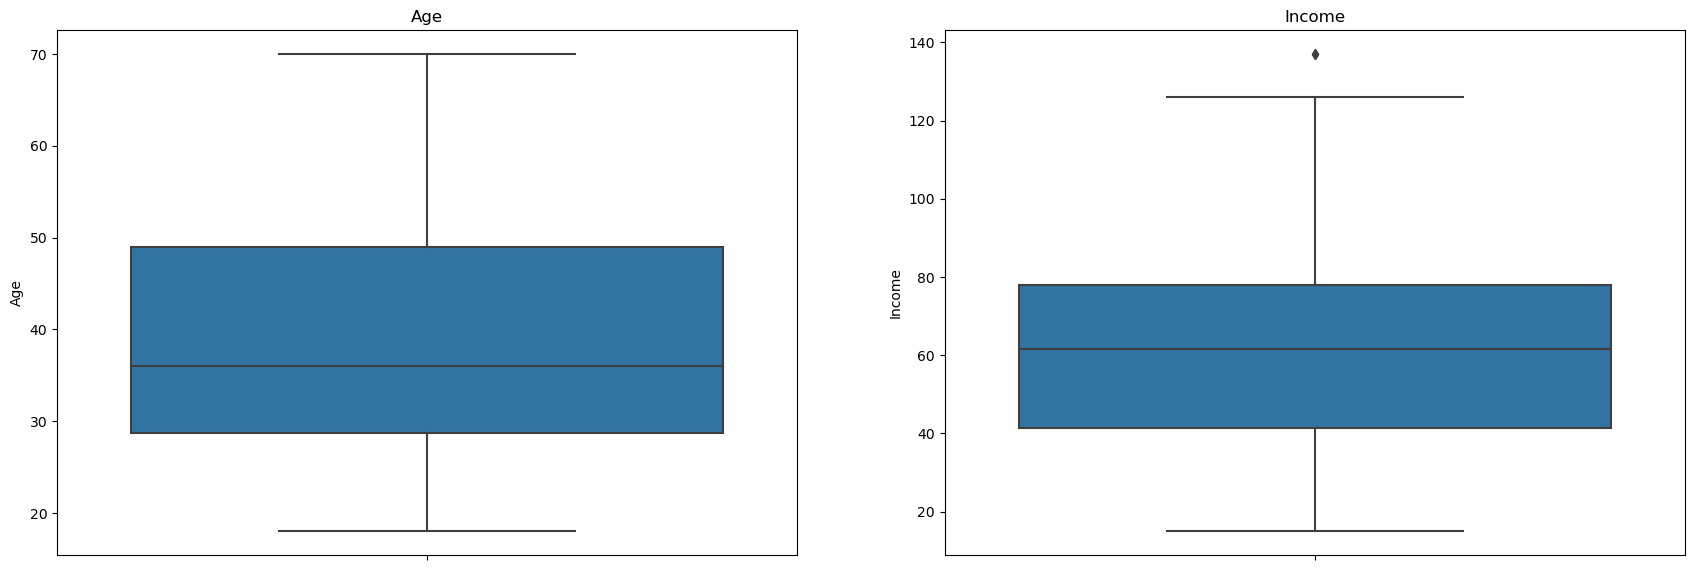

In [17]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=dataset.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=dataset.Income)
plt.title("Income")



plt.show()

<Axes: xlabel='spending', ylabel='Proportion'>

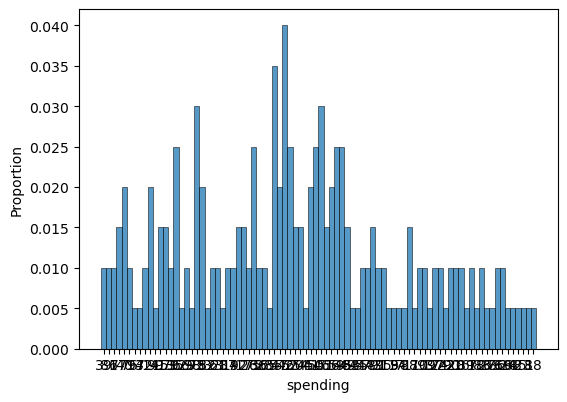

In [18]:
plt.figure(figsize=(21,15))



plt.subplot2grid((3,3), (1,1))
sns.histplot(dataset['spending'].astype(str), stat='proportion')

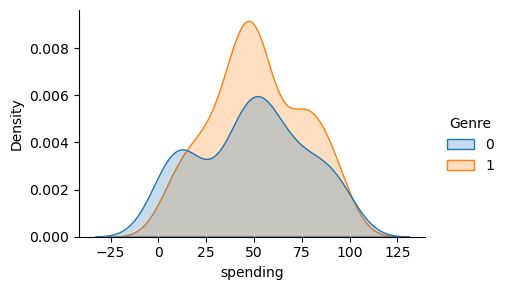

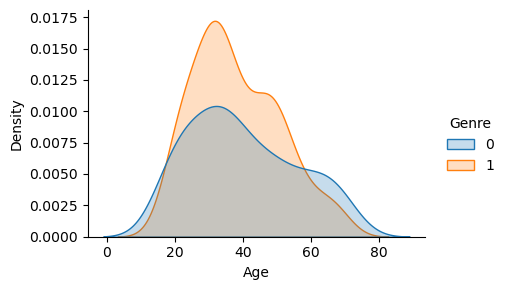

In [19]:
import warnings 

warnings.filterwarnings('ignore')


# Make the plots
sns.displot(dataset, x=dataset['spending'], hue="Genre", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(dataset, x=dataset['Age'], hue="Genre", kind="kde", fill=True,  height=3, aspect=1.5)


## Standardization

In [20]:
col_names = dataset.columns
features = dataset[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Genre,Age,Income,spending
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [21]:
data=scaled[['Age','Income']]
data.head()

,Age,Income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


In [22]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(10)

,wcss_score,no_of_clusters
0,400.000000,1
1,250.588116,2
2,132.855304,3
3,103.051518,4
4,81.408191,5
5,67.369005,6
6,54.247321,7
7,48.207642,8
8,41.804820,9
9,36.847185,10


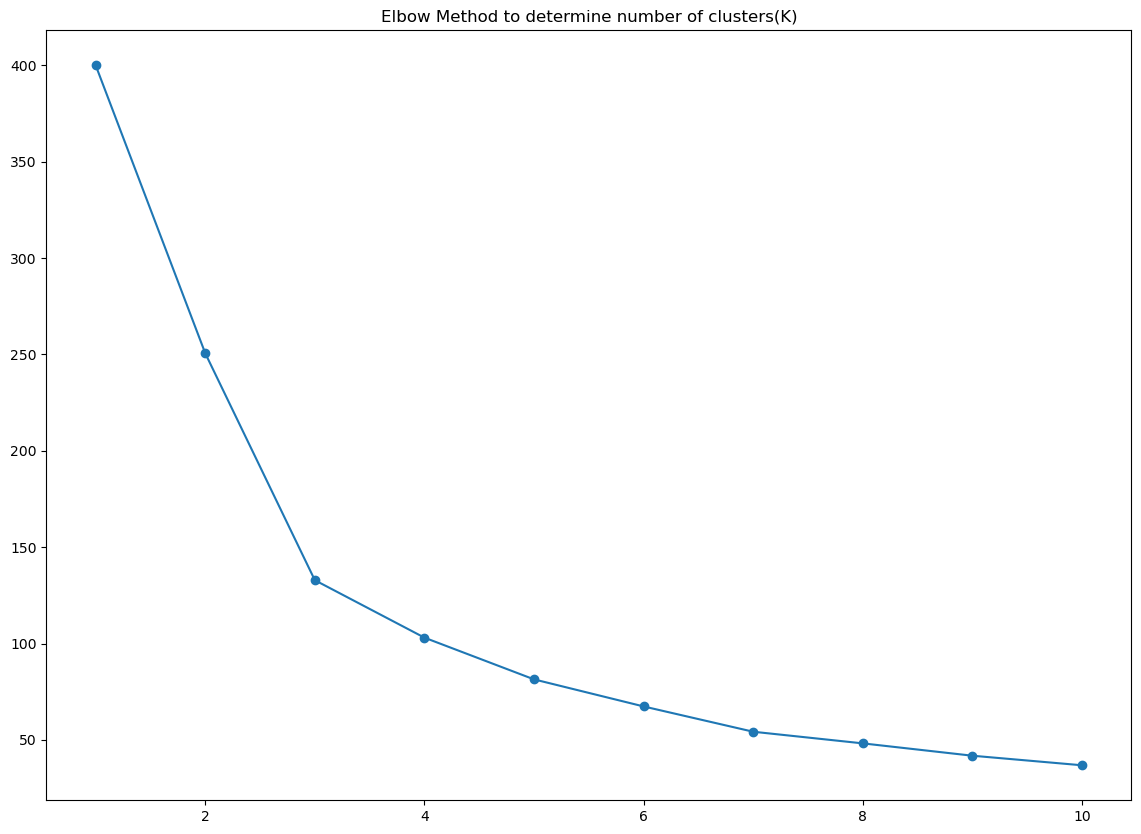

In [23]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K-Means Clustering

In [24]:
kmeans=KMeans(n_clusters=4,random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [25]:
prediction=kmeans.fit_predict(data)
prediction

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
clustered_data = dataset.copy()
clustered_data["cluster_index"] = prediction

In [27]:
clustered_data


,Genre,Age,Income,spending,cluster_index
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,0
197,0,32,126,74,0
198,0,32,137,18,0


<Axes: xlabel='Age', ylabel='Income'>

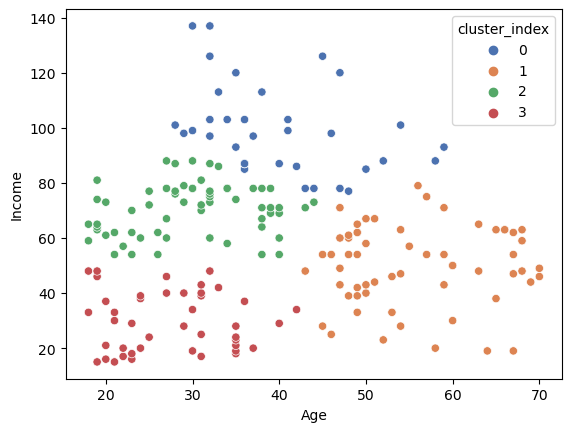

In [28]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [30]:
clustered_data.cluster_index.unique()

array([3, 1, 2, 0])

## Silhouette_score

In [31]:
score = silhouette_score(dataset, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.246 ~ 0


## Agglomerative Clustering

In [32]:
agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [33]:
agg_predict_scaled = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.24834537795671963


In [34]:
agg_predict_data = agc.fit_predict(data)
score = silhouette_score(data, agc.labels_, random_state=0)
print(score)

0.39220113696886005


In [35]:
agg_cluster_scaled = dataset.copy()
agg_cluster_scaled["cluster_index"] = agg_predict_scaled
agg_cluster_scaled.head()

,Genre,Age,Income,spending,cluster_index
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,0
4,1,31,17,40,1


In [36]:
agg_cluster_scaled.cluster_index.unique()

array([0, 1, 2], dtype=int64)

In [37]:
agg_cluster_data = dataset.copy()
agg_cluster_data["cluster_index"] = agg_predict_data
agg_cluster_data.head()

,Genre,Age,Income,spending,cluster_index
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2


<Axes: xlabel='Age', ylabel='Income'>

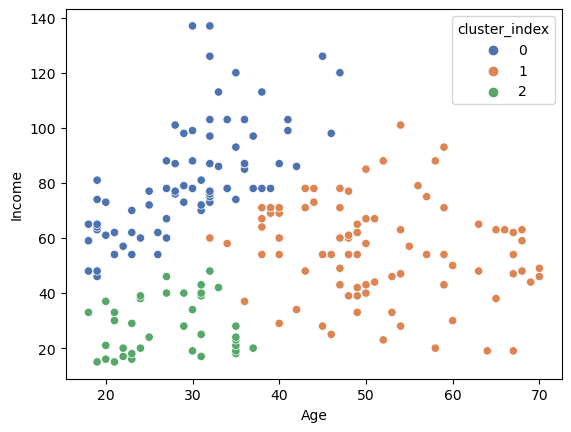

In [38]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_data.Age,
                y=agg_cluster_data.Income,
                hue=agg_cluster_data.cluster_index,
                palette="deep")

In [39]:
agg_cluster_data.groupby('cluster_index').size()

cluster_index
0    77
1    86
2    37
dtype: int64

In [40]:
!pip install plotly

## Dendrogram

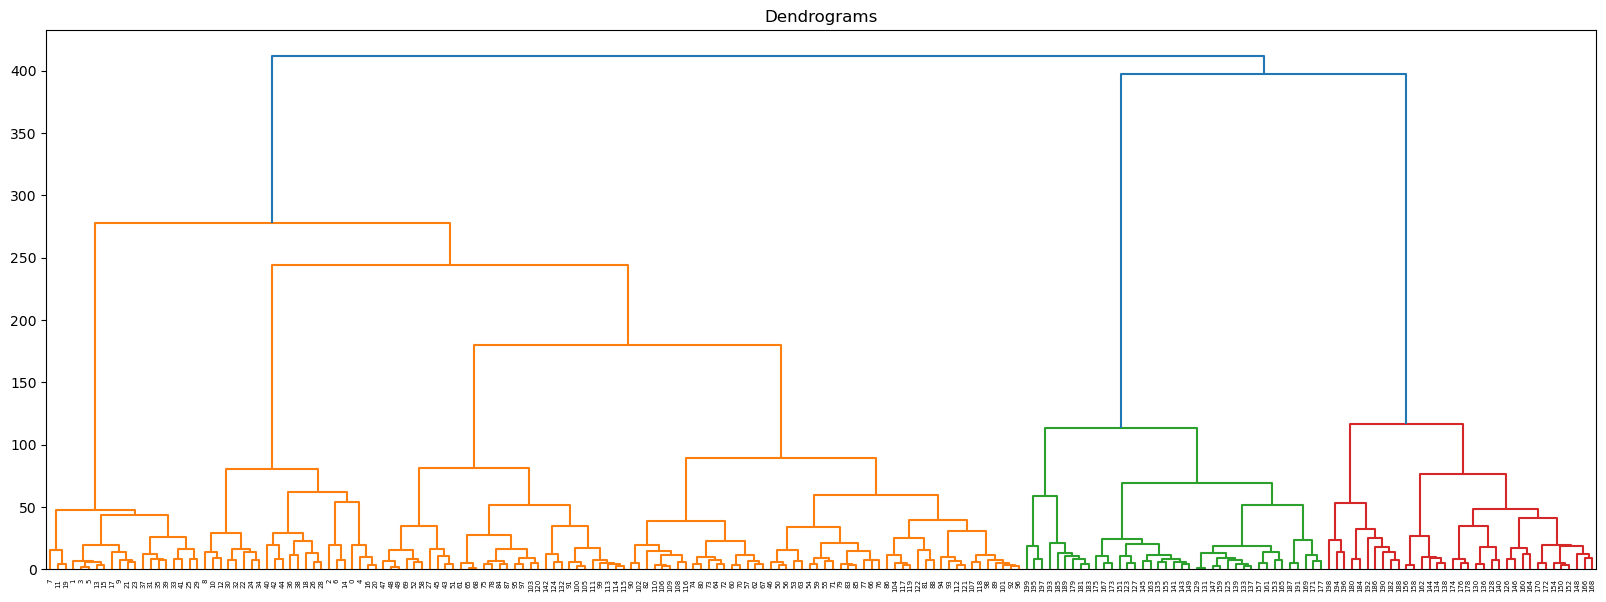

In [41]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(20, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(clustered_data, method='ward', metric='euclidean'))